#### Setting up the environment

In [31]:
#1# Importing libraries: 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

import warnings
warnings.filterwarnings("ignore")

RSEED=42

#2# Visualizing the dataset:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#### Spliting the data: 

In [32]:
df_fraud_dummy = pd.read_csv('./data/df_fraud_dummy.csv')

# This data is unfortunaly too large for my machine. Some cuts in the data set are crucial for applying this module. 
# Choose to keep the most important features,according to what was discussed within the group.

df_fraud_dummy.drop(['ID', 'invoice_date', 'consommation_level_1',
       'consommation_level_2', 'consommation_level_3', 'consommation_level_4',
       'counter_type',"client_catg_12", "client_catg_51", 'region',
       'creation_date','counter_statue_1', 'counter_statue_2', 'counter_statue_3',
       'counter_statue_4', 'counter_statue_5', 'reading_remarque_7',
       'reading_remarque_8', 'reading_remarque_9','counter_number'],axis=1,inplace=True)

# Checking what it's left on my data:
df_fraud_dummy.head()

In [33]:
y = df_fraud_dummy['target']
X = df_fraud_dummy.drop('target', axis=1)

X_train , X_test , y_train , y_test = train_test_split(X,y, stratify=y, test_size=0.3, random_state=RSEED)

,tarif_type,counter_coefficient,months_number,target,sum_consu
0,11,1,4,0,82
1,11,1,4,0,1384
2,11,1,4,0,123
3,11,1,4,0,102
4,11,1,12,0,572


In [ ]:
# Scaling the data for a better performance:
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

##### KNN Module analysis:

In [37]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [38]:
y_pred_train = knn.predict(X_train_norm)

In [39]:
y_pred_test = knn.predict(X_test_norm)

Accuracy training: 0.92
Recall training: [0.99 0.09]
--------------------------------------------------
Accuracy test: 0.91
Recall test: [0.98 0.02]
--------------------------------------------------


Text(95.72222222222221, 0.5, 'Original data')

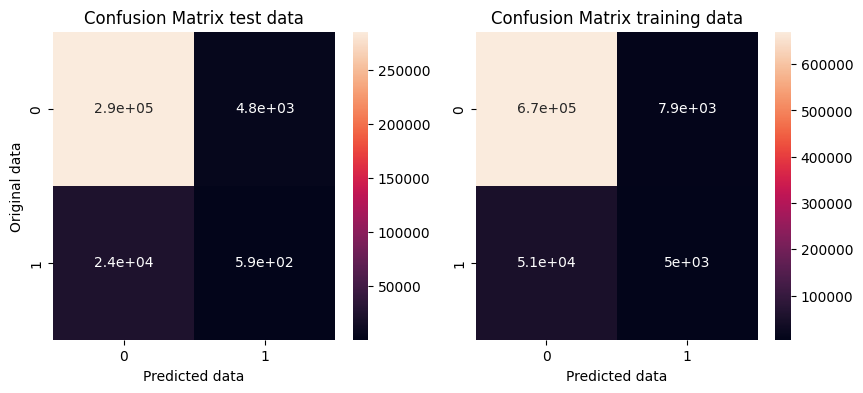

In [40]:
# Print accuracy score for training data
print("Accuracy training:", accuracy_score(y_train, y_pred_train).round(2))
print("Recall training:", recall_score(y_train, y_pred_train, average=None).round(2))
print("-----"*10)

# Print accuracy score for test data
print("Accuracy test:", accuracy_score(y_test, y_pred_test).round(2))
print("Recall test:", recall_score(y_test, y_pred_test, average=None).round(2))
print("-----"*10)

# Print confusion matrix:
matrix_name = y.unique()
fig , ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax1,ax2 = ax
ax1.set_title('Confusion Matrix test data')
ax2.set_title('Confusion Matrix training data')
sns.heatmap(confusion_matrix(y_test, y_pred_test), xticklabels= matrix_name, yticklabels= matrix_name, annot=True, ax=ax1);
sns.heatmap(confusion_matrix(y_train, y_pred_train), xticklabels= matrix_name, yticklabels= matrix_name, annot=True, ax=ax2);
ax1.set_xlabel('Predicted data')
ax2.set_xlabel('Predicted data')
ax1.set_ylabel('Original data')

In [ ]:
#checking the imbalance:
count_y = y.value_counts()
imbalance = count_y / len(y)


## The data has a enormous imbalance level which it's affecting the accuracy of the model.
## We can clearly see this in the recall result and even more clearly in the "imbalance" variable result.
## For this reason, it's not possible to get a good prediction with this module. The module isn't yet capable of
## distinguishing the behavior for fraudulent costumes, since the non-fraudulent ones are overwhelming the data.  

target
0   0.923
1   0.077
Name: count, dtype: float64